# Exercise 9.1 : Network models & degree distributions

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import csv
from math import factorial

%matplotlib inline

## 1. 
Generate four Erdős–Rényi random graphs, each with 100 nodes. Choose four different values for the connection probability (p = 0.005, 0.01, 0.015, 0.02). Plot the graphs and describe your observations. Which real-world systems could be described by such networks?

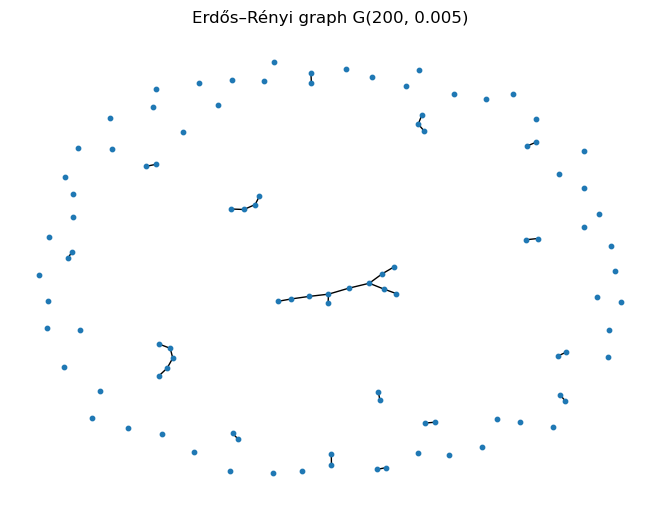

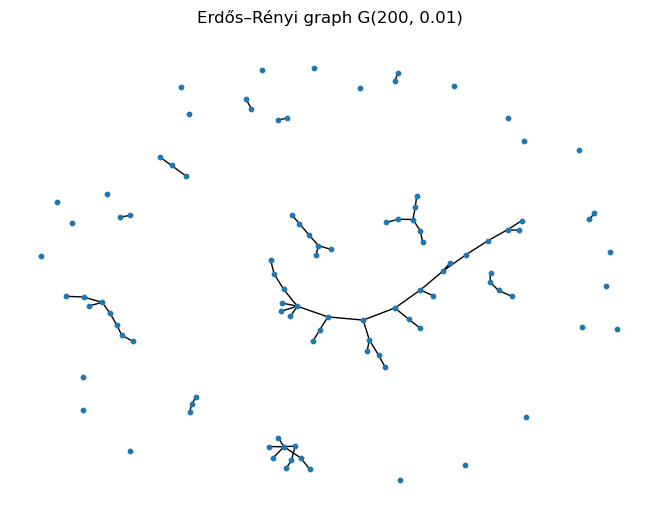

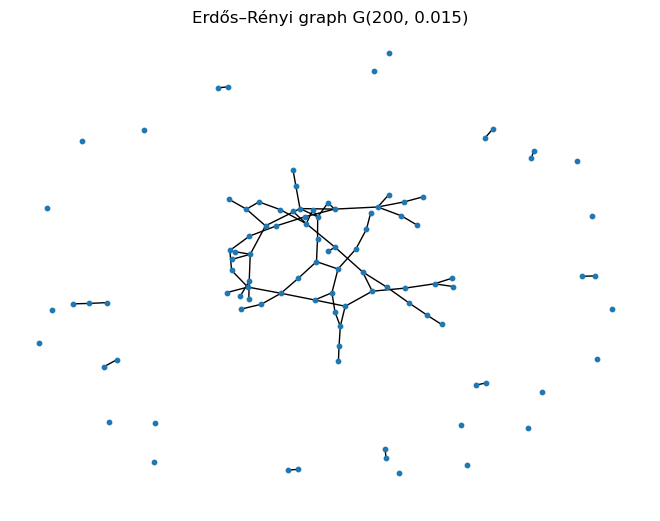

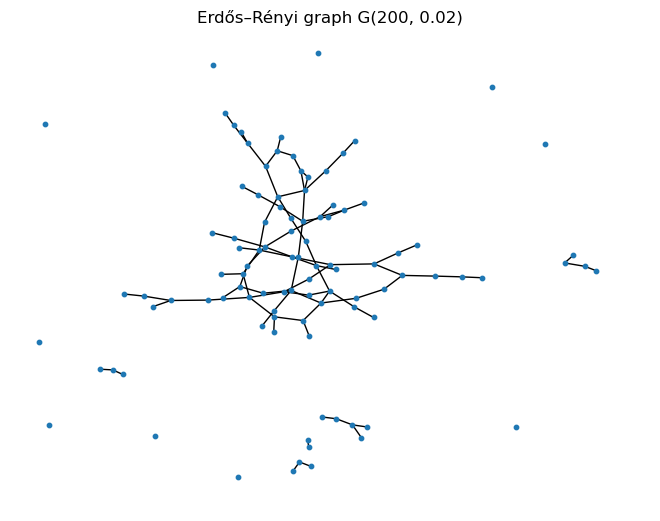

In [52]:
prob = [0.005, 0.01, 0.015, 0.02]
Net = []
for i in prob:
    net = nx.erdos_renyi_graph(n = 100, p = i)
    Net.append(net)
    nx.draw(net, with_labels=False, node_size=10,
        pos=nx.layout.fruchterman_reingold_layout(net))
    plt.title(f"Erdős–Rényi graph G(200, {i})")
    plt.show()

For p = 0.02, Erdös-Rényi network graph shows the central large connected component, while many nodes around side remain isolated and disconnected. And in the giant component in central, it appears chain-like connections.

But I can't find any real-world system I can describe with this model. Because ER model plays a role as reference system in network, every node pairs have the same connection probability independtly.

## 2.
Increase the number of nodes to 1,000 for each of the four networks. Compute and plot the degree distributions of the networks (separately). (5P)

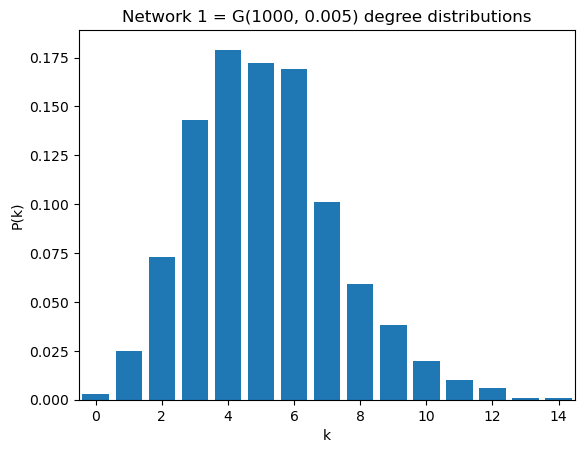

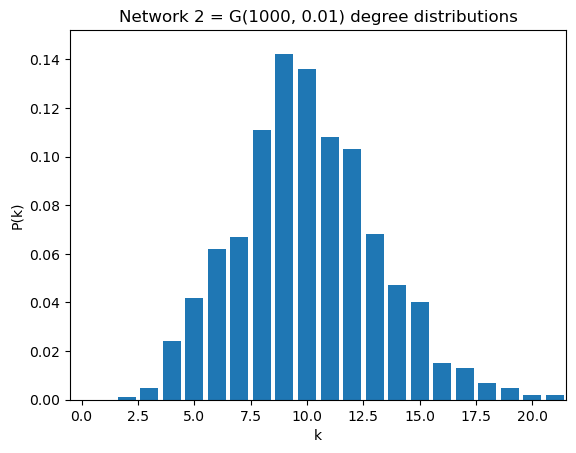

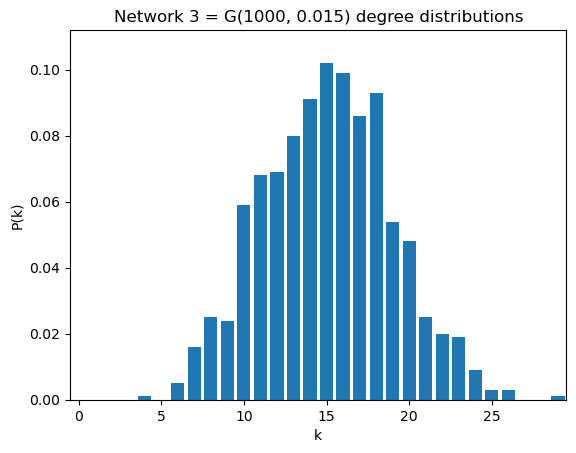

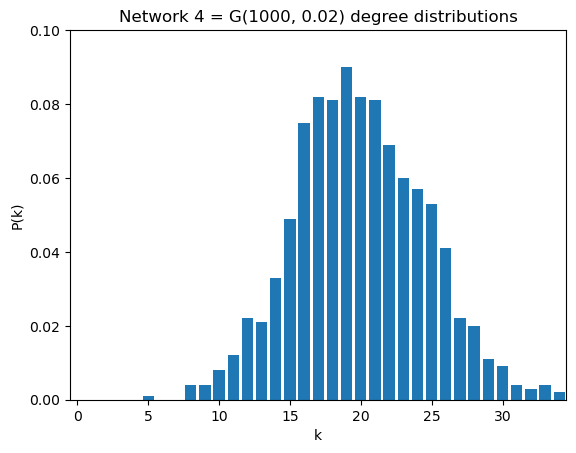

In [53]:
prob = [0.005, 0.01, 0.015, 0.02]
Net = []
for p in prob:
    net = nx.erdos_renyi_graph(n = 1000, p = p)
    Net.append(net)

for i in range(len(prob)):
    N = Net[i].number_of_nodes() # Number of nodes = 1000 
    deg_seq = sorted([deg for node, deg in Net[i].degree()], reverse=True) # sorting each node's degree in order of large - small
    deg_count = collections.Counter(deg_seq) # counting number of each degree number (how many nodes have this degree?)
    k_list, cnt = zip(*deg_count.items()) # making touples (degree, count number of nodes which have this degree number)
    Pk = [_/N for _ in cnt] # each degree's probability  = count nodes of this degree / total number of nodes

    plt.bar(k_list, Pk, width=0.8, color="C0")
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.title(f"Network {i+1} = G(1000, {prob[i]}) degree distributions")
    plt.xlim([-0.5, max(k_list)+0.5])
    plt.ylim([0, max(Pk)+0.01])
    plt.show()

## 3.
Define a function that returns a Poisson distribution to fit (approximately) the degree distributions. The function should take two input variables: the expected value of the degree distribution and a set of x-values corresponding to different network degrees. The output should be the probability of the Poisson distribution for each x-value. Estimate Poisson distributions based on the four random graphs and plot them together with the empirical degree distributions.

Binomial(numbers of experimentm trials, sucess probability of each experiment)
one node's degree = Binomial(N-1, p) *p = probability of connection 
In ER network, N is large enough and p is small enough to estimate Binomial distribution as Possion distribution.

$Binomial(N−1,p)≈Poisson(λ)$.  

The degree follows a Poisson distribution with mean λ.  

$P(k) = \Pr(K = k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$. 

- $K$ = one node's degree.  

- $k$ = number of degree. 

- $\lambda = \langle k \rangle = (N - 1)p \approx Np$. lambda = average degree of network = expected value of the degree


In [55]:
def poisson_pmf(lam, k_vals):
    k_vals = np.asarray(k_vals)
    return np.exp(-lam) * lam**k_vals / np.array([factorial(k) for k in k_vals])

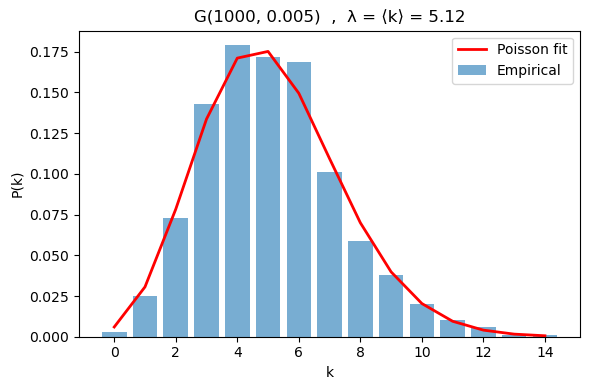

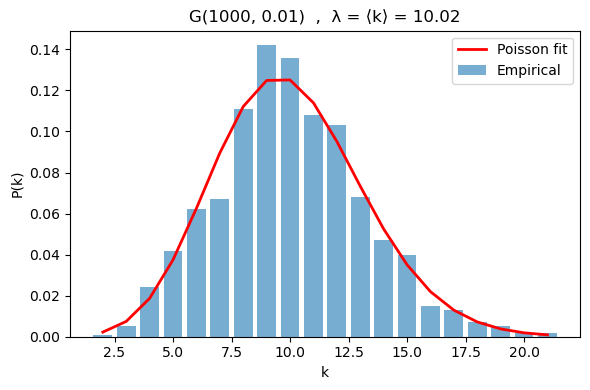

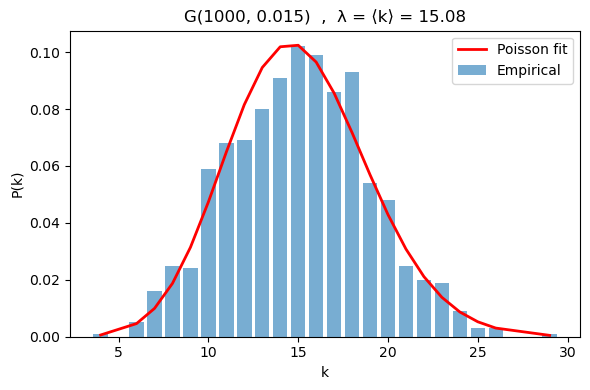

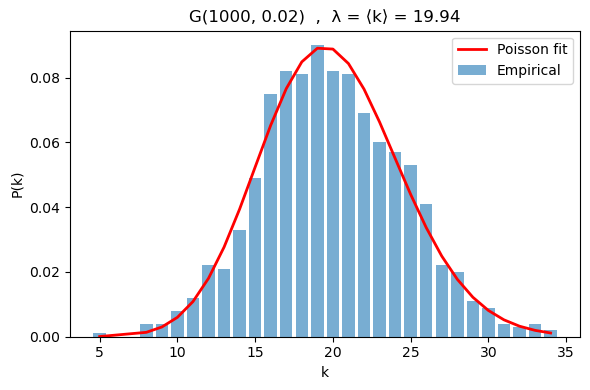

In [56]:
for i in range(len(prob)):

    G = Net[i]
    N = G.number_of_nodes()

    # degree sequence
    deg_seq = [deg for _, deg in G.degree()]
    deg_count = collections.Counter(deg_seq)

    # empirical distribution
    k_list = np.array(sorted(deg_count.keys()))
    cnt = np.array([deg_count[k] for k in k_list])
    Pk_emp = cnt / N

    # expected degree (lambda)
    lam = np.mean(deg_seq)   # <k>

    # Poisson fit
    Pk_pois = poisson_pmf(lam, k_list)

    # plot
    plt.figure(figsize=(6,4))
    plt.bar(k_list, Pk_emp, width=0.8, alpha=0.6, label="Empirical")
    plt.plot(k_list, Pk_pois, "r-", lw=2, label="Poisson fit")

    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.title(f"G(1000, {prob[i]})  ,  λ = ⟨k⟩ = {lam:.2f}")
    plt.legend()
    plt.tight_layout()
    plt.show()